In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set(color_codes=True)

LOADING DATA

In order to load the data, we will use the pandas library and particularly the 'read_excel' method.

In [2]:
data = pd.read_excel('Housing.xlsx')
data.head()

,UniqueID,LandUse,PropertyAddress,SaleDate,SalePrice,Acre,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
0,2045.0,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE",2013-04-09,240000.0,2.3,50000.0,168200.0,235700.0,1986.0,3.0,3.0,0.0
1,16918.0,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE",2014-06-10,366000.0,3.5,50000.0,264100.0,319000.0,1998.0,3.0,3.0,2.0
2,54582.0,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE",2016-09-26,435000.0,2.9,50000.0,216200.0,298000.0,1987.0,4.0,3.0,0.0
3,43070.0,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE",2016-01-29,255000.0,2.6,50000.0,147300.0,197300.0,1985.0,3.0,3.0,0.0
4,22714.0,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE",2014-10-10,278000.0,2.0,50000.0,152300.0,202300.0,1984.0,4.0,3.0,0.0


CLEANING DATA

The major goal of cleaning data is to ensure that all the null values are either eliminated or replaced so as to ensure that the data is fit for analysis.

In [3]:
data.isnull().sum()

UniqueID               0
LandUse                0
PropertyAddress       29
SaleDate               0
SalePrice              0
Acre               30462
LandValue          30462
BuildingValue      30462
TotalValue         30462
YearBuilt          32314
Bedrooms           32320
FullBath           32202
HalfBath           32333
dtype: int64

1. Replace the missing values with appropriate approximations

Here we are filling all of the null values, with the mean value of their corresponding columns.

In [4]:
data['Acre']=data["Acre"].fillna(np.mean(data["Acre"]))
data['LandValue']=data["LandValue"].fillna(np.mean(data["LandValue"]))
data['BuildingValue']=data["BuildingValue"].fillna(np.mean(data["BuildingValue"]))
data['TotalValue']=data["TotalValue"].fillna(np.mean(data["TotalValue"]))
data['YearBuilt']=data["YearBuilt"].fillna(np.mean(data["YearBuilt"]))
data['Bedrooms']=data["Bedrooms"].fillna(np.mean(data["Bedrooms"]))
data['FullBath']=data["FullBath"].fillna(np.mean(data["FullBath"]))
data['HalfBath']=data["HalfBath"].fillna(np.mean(data["HalfBath"]))
data

,UniqueID,LandUse,PropertyAddress,SaleDate,SalePrice,Acre,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
0,2045.0,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE",2013-04-09,240000.0,2.300000,50000.000000,168200.000000,235700.000000,1986.000000,3.000000,3.000000,0.000000
1,16918.0,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE",2014-06-10,366000.0,3.500000,50000.000000,264100.000000,319000.000000,1998.000000,3.000000,3.000000,2.000000
2,54582.0,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE",2016-09-26,435000.0,2.900000,50000.000000,216200.000000,298000.000000,1987.000000,4.000000,3.000000,0.000000
3,43070.0,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE",2016-01-29,255000.0,2.600000,50000.000000,147300.000000,197300.000000,1985.000000,3.000000,3.000000,0.000000
4,22714.0,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE",2014-10-10,278000.0,2.000000,50000.000000,152300.000000,202300.000000,1984.000000,4.000000,3.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56472,30469.0,SINGLE FAMILY,"1435 WINDING CREEK DR, NOLENSVILLE",2015-05-27,157500.0,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921
56473,27707.0,SINGLE FAMILY,"1423 WINDING CREEK DR, NOLENSVILLE",2015-03-02,145000.0,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921
56474,52709.0,VACANT RESIDENTIAL LAND,"1804 GRACE POINT LN, NOLENSVILLE",2016-08-16,234611.0,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921
56475,54042.0,VACANT RESIDENTIAL LAND,"1709 PARK TERRACE LN, NOLENSVILLE",2016-09-07,93844.0,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921


2. Rename the columns to better suited names

Most of the columns are aptly named, maybe except for 'FullBath' and 'HalfBath'. So, we can rename them using the 'rename()' method.

In [5]:
data.columns

Index(['UniqueID ', 'LandUse', 'PropertyAddress', 'SaleDate', 'SalePrice',
       'Acre', 'LandValue', 'BuildingValue', 'TotalValue', 'YearBuilt',
       'Bedrooms', 'FullBath', 'HalfBath'],
      dtype='object')

In [6]:
data.rename(columns={"FullBath":"FullBathroom"},inplace=True)
data.rename(columns={"HalfBath":"HalfBathroom"},inplace=True)

3. Extract the month and year from the sale date.

We can use the 'DatetimeIndex' method in pandas to extract the year, month and day of any given date.

In [7]:
data['Year']=pd.DatetimeIndex(data['SaleDate']).year
data['Month']=pd.DatetimeIndex(data['SaleDate']).month
data['Day']=pd.DatetimeIndex(data['SaleDate']).day
data

,UniqueID,LandUse,PropertyAddress,SaleDate,SalePrice,Acre,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBathroom,HalfBathroom,Year,Month,Day
0,2045.0,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE",2013-04-09,240000.0,2.300000,50000.000000,168200.000000,235700.000000,1986.000000,3.000000,3.000000,0.000000,2013,4,9
1,16918.0,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE",2014-06-10,366000.0,3.500000,50000.000000,264100.000000,319000.000000,1998.000000,3.000000,3.000000,2.000000,2014,6,10
2,54582.0,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE",2016-09-26,435000.0,2.900000,50000.000000,216200.000000,298000.000000,1987.000000,4.000000,3.000000,0.000000,2016,9,26
3,43070.0,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE",2016-01-29,255000.0,2.600000,50000.000000,147300.000000,197300.000000,1985.000000,3.000000,3.000000,0.000000,2016,1,29
4,22714.0,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE",2014-10-10,278000.0,2.000000,50000.000000,152300.000000,202300.000000,1984.000000,4.000000,3.000000,0.000000,2014,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56472,30469.0,SINGLE FAMILY,"1435 WINDING CREEK DR, NOLENSVILLE",2015-05-27,157500.0,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921,2015,5,27
56473,27707.0,SINGLE FAMILY,"1423 WINDING CREEK DR, NOLENSVILLE",2015-03-02,145000.0,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921,2015,3,2
56474,52709.0,VACANT RESIDENTIAL LAND,"1804 GRACE POINT LN, NOLENSVILLE",2016-08-16,234611.0,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921,2016,8,16
56475,54042.0,VACANT RESIDENTIAL LAND,"1709 PARK TERRACE LN, NOLENSVILLE",2016-09-07,93844.0,0.498923,69068.557601,160784.677109,232375.398847,1963.744899,3.089912,1.886014,0.283921,2016,9,7


4. Extract the pin number from the property address

In [9]:
data['Pin'] = data['PropertyAddress'].str[:2]
data['Pin']

0        18
1        18
2        18
3        18
4        18
         ..
56472    14
56473    14
56474    18
56475    17
56476    17
Name: Pin, Length: 56477, dtype: object

In [10]:
data['Pin'].unique()

array(['18', '20', '19', '14', '22', '10', '62', '63', '64', '81', '33',
       '36', '11', '13', '61', '60', '31', '75', '76', '24', '72', '71',
       '69', '0 ', '23', '52', '40', '41', '50', '51', '30', '21', '37',
       '38', '39', '53', 'DI', '46', '42', '43', nan, '70', '12', '91',
       '29', '25', '32', '44', '35', '15', '16', '17', '48', '49', '47',
       '45', '96', '95', '87', '89', '97', '6 ', '26', '68', '74', '92',
       '34', '82', '86', '84', '83', '90', '80', '27', '28', '54', '55',
       '56', '57', '58', '59', '5 ', '73', '93', '65', '85', '94', 'KN',
       '77', '78', '88', '67', '98', '9 ', '66', '2 ', '99', '79', 'PE',
       'HA', '  ', 'AS', '1 ', '3 ', '8 ', '4 ', 'ST', 'CA', 'PO', '7T',
       'MO', '9T', 'BO', 'RU', 'WA', '0,', 'LO', 'MA', 'IN', '4T', 'EA',
       'WE', '7 ', 'SA', 'GR', 'OR', 'BE', 'OL', 'JO', 'SU', 'EV', 'KI',
       'SH', 'BA', 'BI', 'OU', 'PA', 'HI', 'TY', 'CL', 'FR'], dtype=object)

EXPLORATORY DATA ANALYSIS

1. How has the price of properties changed over the years

In [11]:
sales_grouped_data = data.groupby('Year')['SalePrice'].count()
sales_grouped_data

Year
2013    11292
2014    14283
2015    16829
2016    14071
2019        2
Name: SalePrice, dtype: int64

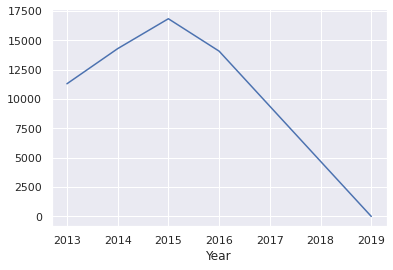

In [12]:
sns.lineplot(x=sales_grouped_data.index, y =sales_grouped_data.values)


As the above line plot clearly suggests, the sale prices of houses peaked around the year 2015, and ever since have rapidly declined.

2. Does a specific month or span of months have the highest property prices?

In [13]:
month_grouped_data = data.groupby('Month')['SalePrice'].sum()
month_grouped_data

Month
1     2.155382e+09
2     6.836434e+08
3     1.191060e+09
4     1.569432e+09
5     1.765650e+09
6     1.978452e+09
7     1.758218e+09
8     1.800308e+09
9     1.672552e+09
10    1.329783e+09
11    1.044454e+09
12    1.531830e+09
Name: SalePrice, dtype: float64

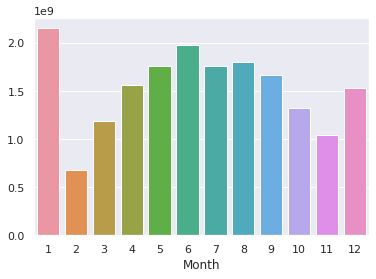

In [14]:
sns.barplot(x=month_grouped_data.index,y=month_grouped_data.values)

From the above barplot, we can make out that the sales are at their peak in January, and around the middle of the year in June, albeit slightly less.

3. For what purpose were the properties generally purchased?

In [15]:
data['LandUse'].unique()

array(['SINGLE FAMILY', 'RESIDENTIAL CONDO', 'VACANT RURAL LAND',
       'VACANT RES LAND', 'DUPLEX', 'VACANT RESIDENTIAL LAND', 'CHURCH',
       'ZERO LOT LINE', 'RESIDENTIAL COMBO/MISC', 'PARSONAGE',
       'OFFICE BLDG (ONE OR TWO STORIES)', 'GREENBELT/RES\nGRRENBELT/RES',
       'MOBILE HOME', 'PARKING LOT', 'CLUB/UNION HALL/LODGE', 'TRIPLEX',
       'VACANT ZONED MULTI FAMILY', 'SPLIT CLASS', 'CONDO', 'QUADPLEX',
       'LIGHT MANUFACTURING', 'FOREST', 'CONVENIENCE MARKET WITHOUT GAS',
       'DORMITORY/BOARDING HOUSE', 'GREENBELT', 'DAY CARE CENTER',
       'METRO OTHER THAN OFC, SCHOOL,HOSP, OR PARK',
       'TERMINAL/DISTRIBUTION WAREHOUSE', 'NIGHTCLUB/LOUNGE',
       'RESTURANT/CAFETERIA', 'VACANT COMMERCIAL LAND',
       'CONDOMINIUM OFC  OR OTHER COM CONDO', 'STRIP SHOPPING CENTER',
       'VACANT RESIENTIAL LAND', 'APARTMENT: LOW RISE (BUILT SINCE 1960)',
       'ONE STORY GENERAL RETAIL STORE', 'NON-PROFIT CHARITABLE SERVICE',
       'SMALL SERVICE SHOP', 'MORTUARY/CEMETER

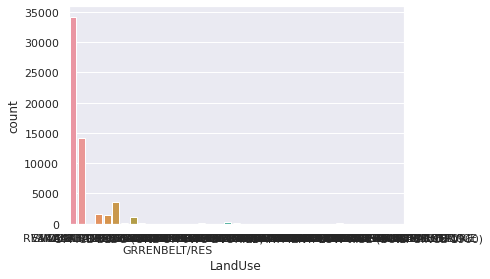

In [16]:
sns.countplot(x='LandUse', data = data)

In [17]:
purpose_grouped_data = data.groupby('LandUse')['LandUse'].count()
purpose_grouped_data.sort_values(ascending = False)

LandUse
SINGLE FAMILY                                 34197
RESIDENTIAL CONDO                             14080
VACANT RESIDENTIAL LAND                        3547
VACANT RES LAND                                1549
DUPLEX                                         1373
ZERO LOT LINE                                  1048
CONDO                                           247
RESIDENTIAL COMBO/MISC                           95
TRIPLEX                                          92
QUADPLEX                                         39
CONDOMINIUM OFC  OR OTHER COM CONDO              35
CHURCH                                           34
MOBILE HOME                                      20
DORMITORY/BOARDING HOUSE                         19
VACANT COMMERCIAL LAND                           17
SPLIT CLASS                                      17
PARKING LOT                                      11
GREENBELT                                        10
FOREST                                           10
PARS

Clearly, from the above arrangement 'SINGLE FAMILY' and 'RESIDENTIAL CONDO' were the major reasons for the purchase of houses.

4. What is the average age of the properties?

In [18]:
math.trunc(data['YearBuilt'].mean())

1963

In [19]:
data['YearBuilt'].max()

2017.0

5. Have the age of houses affected the price?

In [20]:
data.head()

,UniqueID,LandUse,PropertyAddress,SaleDate,SalePrice,Acre,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBathroom,HalfBathroom,Year,Month,Day,Pin
0,2045.0,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE",2013-04-09,240000.0,2.3,50000.0,168200.0,235700.0,1986.0,3.0,3.0,0.0,2013,4,9,18
1,16918.0,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE",2014-06-10,366000.0,3.5,50000.0,264100.0,319000.0,1998.0,3.0,3.0,2.0,2014,6,10,18
2,54582.0,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE",2016-09-26,435000.0,2.9,50000.0,216200.0,298000.0,1987.0,4.0,3.0,0.0,2016,9,26,18
3,43070.0,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE",2016-01-29,255000.0,2.6,50000.0,147300.0,197300.0,1985.0,3.0,3.0,0.0,2016,1,29,18
4,22714.0,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE",2014-10-10,278000.0,2.0,50000.0,152300.0,202300.0,1984.0,4.0,3.0,0.0,2014,10,10,18


In [21]:
age_grouped_data = data.groupby('YearBuilt')['SalePrice'].sum()
age_grouped_data

YearBuilt
1799.0       500000.0
1832.0      1550000.0
1870.0      1134900.0
1880.0        80000.0
1890.0       617500.0
             ...     
2013.0    119982160.0
2014.0    189258629.0
2015.0    280238488.0
2016.0    217806395.0
2017.0      5456548.0
Name: SalePrice, Length: 127, dtype: float64

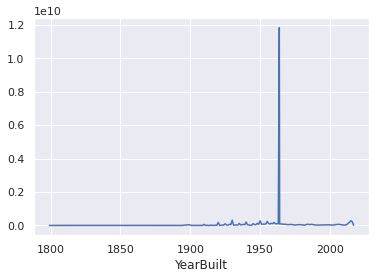

In [22]:
sns.lineplot(x=age_grouped_data.index, y=age_grouped_data.values)

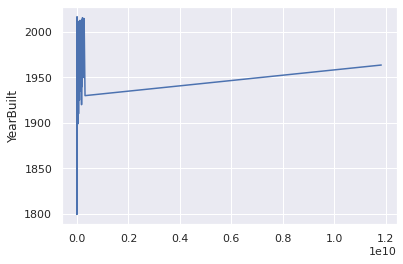

In [23]:
sns.lineplot(y=age_grouped_data.index, x=age_grouped_data.values)

From the above charts it definitely seems that the houses built during between 1950 and 1960 have peaked a lot. The peak is very high compared to other years, but there isn't any continuing trend to showcase that age has always affected the strength.

6. Have the number of rooms in the house affected the price?

In [24]:
data['TotalRooms'] = data['Bedrooms'] + data['FullBathroom'] + data['HalfBathroom']
data['TotalRooms']

0        6.000000
1        8.000000
2        7.000000
3        6.000000
4        7.000000
           ...   
56472    5.259848
56473    5.259848
56474    5.259848
56475    5.259848
56476    5.259848
Name: TotalRooms, Length: 56477, dtype: float64

In [25]:
rooms_grouped_data = data.groupby('TotalRooms')['SalePrice'].sum()
rooms_grouped_data

TotalRooms
0.000000     1.980190e+07
1.000000     2.314900e+06
2.000000     1.452930e+07
3.000000     5.300959e+08
3.089912     6.712295e+07
3.283921     1.320000e+05
4.000000     7.519915e+08
4.283921     1.158600e+06
5.000000     1.533834e+09
5.169936     9.500000e+04
5.259848     1.177669e+10
5.283921     7.949500e+06
6.000000     1.272163e+09
6.283921     1.455751e+07
7.000000     7.693272e+08
7.283921     4.509000e+06
8.000000     5.948213e+08
8.089912     3.850000e+05
8.283921     2.482000e+06
9.000000     3.962831e+08
10.000000    2.539612e+08
11.000000    2.240590e+08
12.000000    1.060801e+08
13.000000    7.785814e+07
14.000000    3.261509e+07
15.000000    7.659456e+06
16.000000    4.400000e+06
17.000000    8.150000e+06
20.000000    3.300000e+06
22.000000    2.438500e+06
Name: SalePrice, dtype: float64

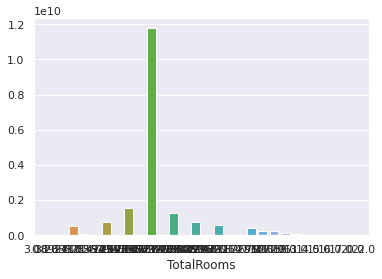

In [26]:
sns.barplot(x = rooms_grouped_data.index, y = rooms_grouped_data.values)

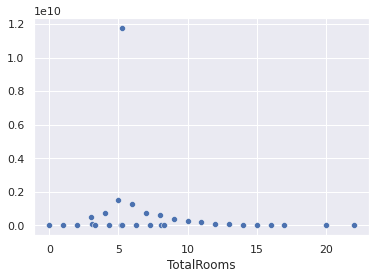

In [27]:
sns.scatterplot(x=rooms_grouped_data.index, y=rooms_grouped_data.values)

In [28]:
math.trunc(data['TotalRooms'].mean())

5

Here, we make an interesting obervation that the sale prices of houses with 5 rooms is the maximum by a large extent. And, in fact, the the number of houses around 5 also show a considerably high sales price. Since, the mean of all of the number of houses is also 5, it's interesting to note that sales prices tend to be high with an average number of rooms in a house.

7. Does the size of the property (no. of acres) have any influence in its price?

In [29]:
property_grouped_data=data.groupby('Acre')['SalePrice'].sum()
property_grouped_data

Acre
0.01        885600.0
0.02       1588500.0
0.03      10632500.0
0.04       1883650.0
0.05       1899200.0
             ...    
47.50       499900.0
51.34       500000.0
62.96       580000.0
68.79        78000.0
160.06     3235790.0
Name: SalePrice, Length: 520, dtype: float64

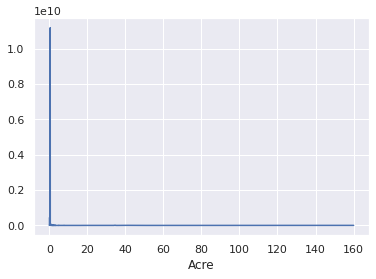

In [30]:
plot = sns.lineplot(x=property_grouped_data.index, y=property_grouped_data.values)

[(0.0, 12.0)]

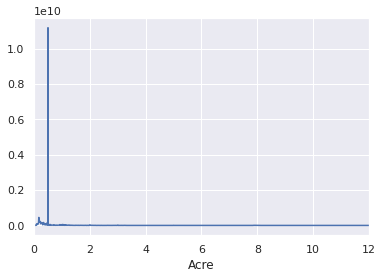

In [31]:
plot = sns.lineplot(x=property_grouped_data.index, y=property_grouped_data.values)
plot.set(xlim=(0,12))

[(0.0, 1.0)]

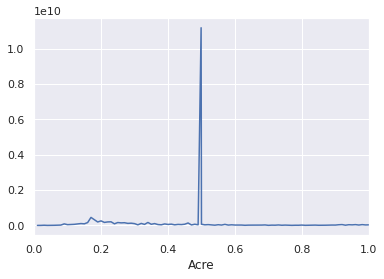

In [32]:
plot = sns.lineplot(x=property_grouped_data.index, y=property_grouped_data.values)
plot.set(xlim=(0,1))

In [33]:
round(data['Acre'].mean(), 2)

0.5

Though there isn't any repeating trend, it is evident from the above line chart that the sale price is at its highest when the size of the property is near or equal to the mean size, that is 0.5

8. Are houses located in specific pin numbers expensive over the others?

In [34]:
pin_grouped_data = data.groupby('Pin')['SalePrice'].sum()
pin_grouped_data

Pin
        2275800.0
0     154786083.0
0,       900000.0
1       9455900.0
10    714117303.0
         ...     
ST       515000.0
SU       398500.0
TY       315000.0
WA       379800.0
WE       435000.0
Name: SalePrice, Length: 140, dtype: float64

In [35]:
century = data[data['YearBuilt']>1900]
century1 = century[century['YearBuilt']>=2000]
century0 = century[century['YearBuilt']<2000]

In [36]:
century1

,UniqueID,LandUse,PropertyAddress,SaleDate,SalePrice,Acre,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBathroom,HalfBathroom,Year,Month,Day,Pin,TotalRooms
8,36500.0,SINGLE FAMILY,"1428 SPRINGFIELD HWY, GOODLETTSVILLE",2015-08-14,285000.0,1.67,45400.0,176900.0,222300.0,2000.0,3.0,2.0,1.0,2015,8,14,14,6.0
13,4512.0,SINGLE FAMILY,"629 GAYLEMORE DR, GOODLETTSVILLE",2013-06-07,189900.0,1.07,40000.0,203600.0,243600.0,2006.0,4.0,4.0,0.0,2013,6,7,62,8.0
30,13354.0,SINGLE FAMILY,"1412 SPRINGFIELD HWY, GOODLETTSVILLE",2014-03-18,359900.0,1.17,40000.0,333300.0,373300.0,2000.0,4.0,4.0,1.0,2014,3,18,14,9.0
60,8903.0,VACANT RES LAND,"332 MONCRIEF AVE, GOODLETTSVILLE",2013-10-25,25000.0,0.39,24000.0,175900.0,199900.0,2014.0,3.0,2.0,0.0,2013,10,25,33,5.0
61,16921.0,SINGLE FAMILY,"332 MONCRIEF AVE, GOODLETTSVILLE",2014-06-24,219900.0,0.39,24000.0,175900.0,199900.0,2014.0,3.0,2.0,0.0,2014,6,24,33,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54080,35530.0,SINGLE FAMILY,"4932 HICKORY WOODS E, ANTIOCH",2015-07-27,163000.0,0.23,25000.0,123300.0,148300.0,2000.0,3.0,2.0,0.0,2015,7,27,49,5.0
54083,21899.0,SINGLE FAMILY,"4480 LAVERGNE COUCHVILLE PIKE, ANTIOCH",2014-09-03,14000.0,0.31,25000.0,157500.0,182500.0,2015.0,3.0,2.0,1.0,2014,9,3,44,6.0
54084,21900.0,SINGLE FAMILY,"4480 LAVERGNE COUCHVILLE PIKE, ANTIOCH",2014-09-24,23000.0,0.31,25000.0,157500.0,182500.0,2015.0,3.0,2.0,1.0,2014,9,24,44,6.0
54085,33753.0,SINGLE FAMILY,"4480 LAVERGNE COUCHVILLE PIKE, ANTIOCH",2015-06-30,219100.0,0.31,25000.0,157500.0,182500.0,2015.0,3.0,2.0,1.0,2015,6,30,44,6.0


In [37]:
grouped_data_21 = century1.groupby('YearBuilt')['SalePrice'].sum()
grouped_data_21

YearBuilt
2000.0     34901984.0
2001.0     18059001.0
2002.0     20885705.0
2003.0     21461521.0
2004.0     49467077.0
2005.0     61431654.0
2006.0     58466851.0
2007.0     65135601.0
2008.0     40371556.0
2009.0     32320700.0
2010.0     19659522.0
2011.0     24248100.0
2012.0     39530301.0
2013.0    119982160.0
2014.0    189258629.0
2015.0    280238488.0
2016.0    217806395.0
2017.0      5456548.0
Name: SalePrice, dtype: float64

In [38]:
grouped_data_20 = century0.groupby('YearBuilt')['SalePrice'].count()
grouped_data_20

YearBuilt
1901.0      1
1902.0      2
1903.0      3
1904.0      8
1905.0      9
         ... 
1995.0     84
1996.0     97
1997.0    138
1998.0     87
1999.0    123
Name: SalePrice, Length: 100, dtype: int64

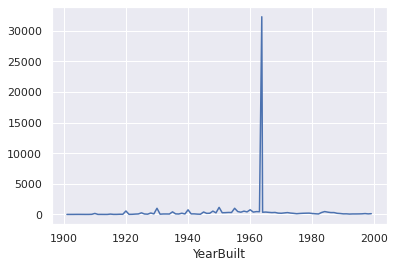

In [39]:
sns.lineplot(x = grouped_data_20.index, y = grouped_data_20.values)

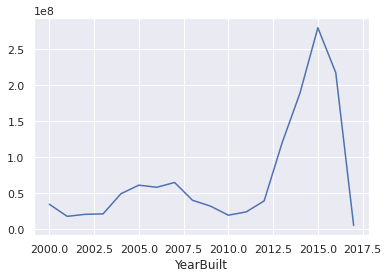

In [40]:
sns.lineplot(x = grouped_data_21.index, y = grouped_data_21.values)